<a href="https://colab.research.google.com/github/jeff-ai-ml/genai-langgraph/blob/main/Exercise_4_Conditional_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
  number1: int
  operation1: str
  number2: int
  answer1:int
  number3:int
  operation2: str
  number4:int
  answer2:int




In [ ]:
def add_node1(state: AgentState) -> AgentState:
  """This is addition node1 and it will add number1 and number2"""
  state["answer1"] = f"The Addition of {state['number1}']} and {state['number2']} is : {state['number1'] + state['number2']}"
  return state
def subtract_node1(state: AgentState) -> AgentState:
  """This is subtraction node1 and it will subtract number1 and number2"""
  state["answer1"] = f"The Subtraction of {state['number1']} and {state['number2']} is : {state['number1'] - state['number2']}"
  return state

def decide_next_node_1(state: AgentState) -> AgentState:
  """This node decides which node to be secected for execution based on the operation passed for num1 and num2"""
  if state["operation1"] == "+":
    return "addition_operation_1"
  elif state["operation1"] == "-":
    return "subtraction_operation_1"

def add_node2(state: AgentState) -> AgentState:
  """This is addition node2 and it will add number1 and number2"""
  state["answer2"] = f"The Addition of {state['number3']} and {state['number4']} is : {state['number3'] + state['number4']}"
  return state
def subtract_node2(state: AgentState) -> AgentState:
  """This is subtraction node2 and it will subtract number1 and number2"""
  state["answer2"] = f"The Subtraction of {state['number3']} and {state['number4']} is {state['number3'] - state['number4']}"
  return state


def decide_next_node_2(state: AgentState) -> AgentState:
  """This node decides which node to be secected for execution based on the operation passed for num3 and num4"""
  if state["operation2"] == "+":
    return "addition_operation_2"
  elif state["operation2"] == "-":
    return "subtraction_operation_2"


In [ ]:
graph = StateGraph(AgentState)
graph.add_node("add node 1", add_node1)
graph.add_node("subtract node 1", subtract_node1)
graph.add_node("router1", lambda state:state)


graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node_1,
    {
        "addition_operation_1" : "add node 1",
        "subtraction_operation_1" : "subtract node 1"
    }
)


graph.add_node("router2", lambda state:state)

graph.add_edge("add node 1", "router2")
graph.add_edge("subtract node 1", "router2")



#second section!

graph.add_node("add node 2", add_node2)
graph.add_node("subtract node 2", subtract_node2)

graph.add_conditional_edges(
    "router2",
    decide_next_node_2,
    {
        "addition_operation_2" : "add node 2",
        "subtraction_operation_2" : "subtract node 2"
    }
)

graph.add_edge("add node 2", END)
graph.add_edge("subtract node 2", END)

app = graph.compile()

In [ ]:
graph_code = app.get_graph().draw_mermaid()  # This gives you the raw Mermaid text
print(graph_code)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	add_node_1(add node 1)
	subtract_node_1(subtract node 1)
	router1(router1)
	router2(router2)
	add_node_2(add node 2)
	subtract_node_2(subtract node 2)
	__end__([<p>__end__</p>]):::last
	__start__ --> router1;
	add_node_1 --> router2;
	router1 -. &nbsp;addition_operation_1&nbsp; .-> add_node_1;
	router1 -. &nbsp;subtraction_operation_1&nbsp; .-> subtract_node_1;
	router2 -. &nbsp;addition_operation_2&nbsp; .-> add_node_2;
	router2 -. &nbsp;subtraction_operation_2&nbsp; .-> subtract_node_2;
	subtract_node_1 --> router2;
	add_node_2 --> __end__;
	subtract_node_2 --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



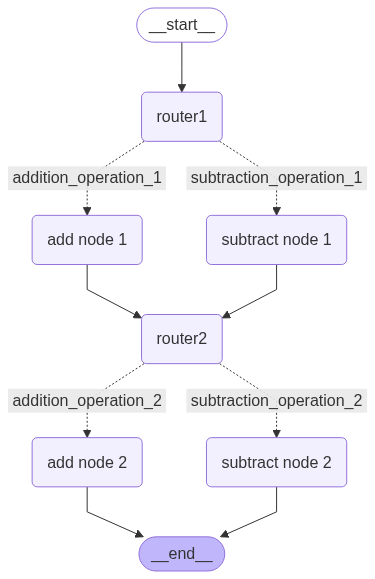

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
intial_state = AgentState(number1 = 10 , operation1 = "-", number2 = 5, number3 = 7 , operation2 = "+", number4 = 2 )

result = app.invoke(intial_state)

print(result)

print(result["answer1"])
print(result["answer2"])

{'number1': 10, 'operation1': '-', 'number2': 5, 'answer1': 'The Subtraction of 10 and 5 is : 5', 'number3': 7, 'operation2': '+', 'number4': 2, 'answer2': 'The Addition of 7 and 2 is : 9'}
The Subtraction of 10 and 5 is : 5
The Addition of 7 and 2 is : 9
